In [1]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LinearRegression



In [2]:
## load the dataset
data = pd.read_csv('gender_submission.csv')
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
## Check for correlation
corr_mat = train_data.corr(numeric_only =True)

<AxesSubplot: >

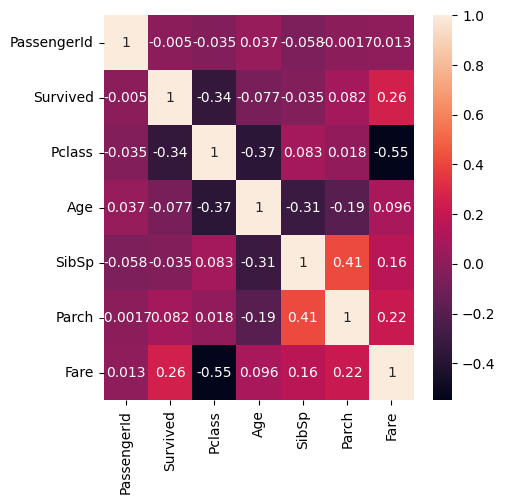

In [9]:
## Showing correlation using heatmap
plt.figure(figsize=(5,5))
sns.heatmap(corr_mat, annot=True)

In [10]:
# Drop unnecessary columns
train_data.drop(["PassengerId","Pclass","Name","SibSp","Ticket","Cabin","Fare","Embarked"], axis=1, inplace=True)
train_data.tail()

test_data.drop(["PassengerId","Pclass","Name","SibSp","Ticket","Cabin","Fare","Embarked"], axis=1, inplace=True)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Parch     891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [12]:
## Replacing Sex for easy count (male = 0, female = 1)
train_data["Sex"] = np.where(train_data["Sex"] == "female", 1, 0)
test_data["Sex"] = np.where(test_data["Sex"] == "female", 1, 0)

In [13]:
train_data.isnull().sum()

Survived      0
Sex           0
Age         177
Parch         0
dtype: int64

In [14]:
test_data.isnull().sum()

Sex       0
Age      86
Parch     0
dtype: int64

In [15]:
train_data.describe()

,Survived,Sex,Age,Parch
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,0.352413,29.699118,0.381594
std,0.486592,0.477990,14.526497,0.806057
min,0.000000,0.000000,0.420000,0.000000
25%,0.000000,0.000000,20.125000,0.000000
50%,0.000000,0.000000,28.000000,0.000000
75%,1.000000,1.000000,38.000000,0.000000
max,1.000000,1.000000,80.000000,6.000000


In [16]:
## Fill null values with mean of Age (different usages)
train_data.Age.fillna(29.5, inplace = True)
test_data['Age'].fillna(29.9, inplace = True)

In [17]:
train_data.isnull().sum()

Survived    0
Sex         0
Age         0
Parch       0
dtype: int64

In [18]:
test_data.head()

,Sex,Age,Parch
0,0,34.5,0
1,1,47.0,0
2,0,62.0,0
3,0,27.0,0
4,1,22.0,1


In [19]:
test_data.insert(0, 'Survived', data['Survived'])

In [20]:
test_data.head()

,Survived,Sex,Age,Parch
0,0,0,34.5,0
1,1,1,47.0,0
2,0,0,62.0,0
3,0,0,27.0,0
4,1,1,22.0,1


In [21]:
## spliting the dataset
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

X_test = test_data.drop('Survived', axis=1)
y_test = test_data['Survived']

In [22]:
## standardiazation (feature scaling)
## input data is transformed to have a mean of zero and variance of 1
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

---

## Logistic Regression

In [23]:
## Logistic Regression Model
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)

LogisticRegression()

In [24]:
## make prediction
y_pred = Log_reg.predict(X_test)

In [25]:
## Get the result in a dataframe
result = {"Actual Survival: ":y_test, "Predicted Survival: ": y_pred}
result_df = pd.DataFrame(result)
result_df

,Actual Survival:,Predicted Survival:
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [26]:
## Accuaracy
print("Accuarcy:", metrics.accuracy_score(y_test, y_pred))

Accuarcy: 0.9976076555023924


This result showed that the Logistic Regression model was 99% accurate.

In [27]:
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[266,   0],
       [  1, 151]])

In [28]:
meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared:{:.2f}'.format(Log_reg.score(X_test, y_test)))
print('Mean Absolute Error:', meanAbError)
print('Mean Square Error:', meanSqError)
print('Root Mean Square Error:', rootMeanSqrr)

R squared:1.00
Mean Absolute Error: 0.0023923444976076554
Mean Square Error: 0.0023923444976076554
Root Mean Square Error: 0.048911598804451846


If it is close to 0, means better accuracy, except Rsquared !

---

## Gaussian Naive Bayes (GaussianNB)

In [29]:
## create our naive bayes gaussian model
gaussian_model = GaussianNB()

## train our model
gaussian_model.fit(X_train, y_train)

## make prediction
y_pred = gaussian_model.predict(X_test)

## Accuarcy
print("Accuarcy:", metrics.accuracy_score(y_test, y_pred))

Accuarcy: 0.9976076555023924


In [30]:
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[266,   0],
       [  1, 151]])

In [31]:
meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared:{:.2f}'.format(Log_reg.score(X_test, y_test)))
print('Mean Absolute Error:', meanAbError)
print('Mean Square Error:', meanSqError)
print('Root Mean Square Error:', rootMeanSqrr)

R squared:1.00
Mean Absolute Error: 0.0023923444976076554
Mean Square Error: 0.0023923444976076554
Root Mean Square Error: 0.048911598804451846


It gave exactly the same result as logistic regression.

---

## Bernoulli Naive Bayes (BernoulliNB)

In [32]:
## create our naive bayes gaussian model
bernoulli_model = BernoulliNB()

## train our model
bernoulli_model.fit(X_train, y_train)

## make prediction
y_pred = bernoulli_model.predict(X_test)

## Accuarcy
print("Accuarcy:", metrics.accuracy_score(y_test, y_pred))

Accuarcy: 1.0


In [33]:
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[266,   0],
       [  0, 152]])

In [34]:
meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared:{:.2f}'.format(Log_reg.score(X_test, y_test)))
print('Mean Absolute Error:', meanAbError)
print('Mean Square Error:', meanSqError)
print('Root Mean Square Error:', rootMeanSqrr)

R squared:1.00
Mean Absolute Error: 0.0
Mean Square Error: 0.0
Root Mean Square Error: 0.0


---
## Decision Tree

In [35]:
# Create default Decision Tree classifer object
decisionTree_model_gini = DecisionTreeClassifier()

# Use entropy criterion (Entropy düşükse saflık daha iyi)
decisionTree_model_entropy = DecisionTreeClassifier(criterion="entropy")

# Use max depth of 3
decisionTree_model_depth3 = DecisionTreeClassifier(max_depth=3)

# Fit the trees
decisionTree_model_gini.fit(X_train,y_train)
decisionTree_model_entropy.fit(X_train,y_train)
decisionTree_model_depth3.fit(X_train,y_train)

# Make prediction
y_pred_gini = decisionTree_model_gini.predict(X_test)
y_pred_entropy = decisionTree_model_entropy.predict(X_test)
y_pred_depth3 = decisionTree_model_depth3.predict(X_test)

print("Accuracy (Gini):",metrics.accuracy_score(y_test, y_pred_gini))
print("Accuracy (Entropy):",metrics.accuracy_score(y_test, y_pred_entropy))
print("Accuracy (Depth3):",metrics.accuracy_score(y_test, y_pred_depth3))

Accuracy (Gini): 0.8349282296650717
Accuracy (Entropy): 0.8373205741626795
Accuracy (Depth3): 0.9736842105263158


For Gini, Entropy, Depth the result is supposed to be close to 0.  
These results show that the Decision Tree model does not work well.

---

## Support Vector Machines (SVMs)

In [36]:
#Create 3 SVM Classifiers
linear_SVM = svm.SVC(kernel='linear')   # Linear Kernel
sigmoid_SVM = svm.SVC(kernel='sigmoid') # Sigmoid Kernel
rbf_SVM = svm.SVC(kernel='rbf')         # RBF Kernel

#Train the model using the training sets
linear_SVM.fit(X_train, y_train)
sigmoid_SVM.fit(X_train, y_train)
rbf_SVM.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_linear = linear_SVM.predict(X_test)
y_pred_sigmoid = sigmoid_SVM.predict(X_test)
y_pred_rbf = rbf_SVM.predict(X_test)

#Calculate the accuracy of our model
print("Accuracy (linear):",metrics.accuracy_score(y_test, y_pred_linear))
print("Accuracy (sigmoid):",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("Accuracy (rbf):",metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy (linear): 1.0
Accuracy (sigmoid): 0.8014354066985646
Accuracy (rbf): 0.9712918660287081


If it is close to 1, means better accuracy.

---

## Linear Regression

In [37]:
## Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

## Prediction
y_pred = lin_reg.predict(X_test)

## Metric in regression (Regressionda doğruluğu kontrol etmek için kullanıyoruz)
# RSQUARED 0-- not good, 1-- good
# MEAN ABSOLUTE ERROR -- average absolute value between actual values and predicted values
# MEAN SQUARED ERROR -- measure the average squraed differences between the actual and the predicted values
# ROOT MEAN SQUARED ERROR -- is just the square root of the mean square error
""" Rsquared dışında hepsi 0'a yakın olmalı. 0'dan uzaklaşması doğruluktan uzaklaşması demek."""

meanAbError = metrics.mean_absolute_error(y_test, y_pred)
meanSqError = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqrr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared:{:.2f}'.format(lin_reg.score(X_test, y_test)))
print('Mean Absolute Error:', meanAbError)
print('Mean Square Error:', meanSqError)
print('Root Mean Square Error:', rootMeanSqrr)

R squared:0.79
Mean Absolute Error: 0.2143745767026612
Mean Square Error: 0.048234030975207176
Root Mean Square Error: 0.21962247374803695
